## Principal component analysis.

#### The problem statement is given below:
#### 1.The dataset given for this problem consists of data extracted from satellite images. The number of features is 36.
#### 2.Reduce the dimensionality of the dataset using PCA. The threshold limits for the eigenvalues should be varied from 0.9 to 0.97 in steps of 0.01.
#### 3.Obtain the Scree plot for each of these cases. Find the number of principal components retained due to the thresholding.

In [ ]:
#python libraries for data manipulation and math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#python library for providing dataset
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv('PCA_practice_dataset.csv')
dataset

,-3.125000000000000000e-02,2.363639999999999908e-01,2.380950000000000011e-01,-9.090910000000000657e-02,0.000000000000000000e+00,3.818179999999999907e-01,3.263159999999999950e-01,-1.562500000000000000e-02,-1.250000000000000000e-01,5.533979999999999455e-01,...,5.769229999999999636e-01,4.712640000000000162e-01,-3.333330000000000320e-02,-4.615380000000000177e-02,5.247519999999999962e-01,4.105260000000000020e-01,-1.562500000000000000e-02.2,-1.875000000000000000e-01.1,4.951459999999999750e-01,5.157890000000000530e-01
0,-0.031250,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.031250,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.125000,0.533981,0.368421
1,-0.031250,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.031250,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.031250,0.650485,0.452632
2,-0.031250,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.093750,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.250000,0.203883,0.094737
3,-0.031250,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.250000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.281250,0.495146,0.410526
4,-0.031250,0.381818,0.357143,-0.024793,0.000000,0.381818,0.431579,-0.015625,-0.031250,0.553398,...,0.480769,0.471264,-0.033333,-0.046154,0.623762,0.515789,0.046875,0.062500,0.592233,0.410526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,0.088958,0.016323,-0.213069,-0.376970,0.117490,0.074181,-0.182175,-0.286841,0.213958,0.240733,...,-0.120300,-0.329808,-0.370927,-0.015385,0.135798,-0.234572,-0.281250,0.093750,0.058469,-0.158971
8037,-0.243556,-0.092159,-0.477827,-0.536054,-0.094557,-0.092159,-0.411973,-0.498926,-0.122852,-0.027792,...,0.077584,-0.261208,-0.527032,-0.012212,0.188800,-0.260264,-0.405176,-0.032324,0.009709,-0.263158
8038,-0.136975,-0.068480,-0.466067,-0.504132,-0.006181,-0.054545,-0.233154,-0.409244,-0.061188,-0.067961,...,-0.168585,-0.566658,-0.532634,-0.279224,-0.223097,-0.539991,-0.534244,-0.181512,-0.053079,-0.416328
8039,-0.163077,-0.090909,-0.476190,-0.517050,-0.096774,-0.090909,-0.359223,-0.437500,-0.250000,-0.029126,...,0.130414,-0.292378,-0.450000,-0.052876,0.029703,-0.288810,-0.406250,-0.031250,0.087379,-0.263158


In [5]:
scaler = StandardScaler()
data_scaler = scaler.fit_transform(dataset)
data_scaler.shape

(8041, 35)

## Find eigen vectors

In [6]:
mean_ = np.mean(data_scaler,axis=0)
print(mean_.shape)
cov = np.cov(data_scaler)
print(cov.shape)
eig_val,eig_vec = np.linalg.eig(cov)

(35,)
(8041, 8041)


## Finding the right sigular vector

In [7]:
eigen_vec_ls = []
#eig1 = train_mat.T@eig_vec[:,0]
#print(eig1.shape)
for i in range(eig_vec.shape[1]):
    eig1 = data_scaler.T@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))

## Finding the Principle components

In [8]:
sort_idx = np.argsort(eig_val) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []
principal_eig_val = []
i=0
while(temp_sum<0.95*eig_val_sum):
    principal_eig_vec.append(eigen_vec_ls[sort_idx[i]])
    principal_eig_val.append(eig_val[sort_idx[i]])
    temp_sum += eig_val[sort_idx[i]]
    i += 1
print("Number of components is {}".format(i))

Number of components is 7


## 3) obtaining the scree plot

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


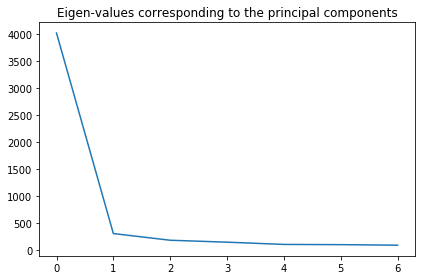

In [9]:
fig, ax = plt.subplots()

ax.plot(principal_eig_val)
ax.set_title("Eigen-values corresponding to the principal components")

plt.tight_layout()